<a href="https://colab.research.google.com/github/TanishqaRavirala/Emotion-Detection-for-Images-using-ResNet50/blob/main/Emotion_detection_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

import os
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd

from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_folder='/content/drive/MyDrive/CVIP Project/CK+48'
sub_folders=os.listdir(dataset_folder)

sub_folders

['disgust', 'anger', 'contempt', 'happy', 'fear', 'surprise', 'sadness']

In [ ]:
# Reading folder names as labels and images underneath
i=0
last=[]
images=[]
labels=[]
temp = sub_folders

# reading folders in the main dataset folder, one at a time
for sub_folder in sub_folders:
  sub_folder_index = temp.index(sub_folder)
  label = sub_folder_index

  path = dataset_folder+'/'+sub_folder
  sub_folder_images= os.listdir(path)

  # reading images in the sub folder, one at a time
  for image in sub_folder_images:
    image_path = path+'/'+image
    print(image_path+"\t"+str(label))

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image= cv2.resize(image,(48,48))
    images.append(image)
    labels.append(label)
    i+=1
  last.append(i)

/content/drive/MyDrive/CVIP Project/CK+48/disgust/S134_008_00000011.png	0
/content/drive/MyDrive/CVIP Project/CK+48/disgust/S108_006_00000019.png	0
/content/drive/MyDrive/CVIP Project/CK+48/disgust/S129_011_00000016.png	0
/content/drive/MyDrive/CVIP Project/CK+48/disgust/S111_007_00000013.png	0
/content/drive/MyDrive/CVIP Project/CK+48/disgust/S131_010_00000016.png	0
/content/drive/MyDrive/CVIP Project/CK+48/disgust/S132_005_00000016.png	0
/content/drive/MyDrive/CVIP Project/CK+48/disgust/S116_006_00000005.png	0
/content/drive/MyDrive/CVIP Project/CK+48/disgust/S109_005_00000014.png	0
/content/drive/MyDrive/CVIP Project/CK+48/disgust/S116_006_00000006.png	0
/content/drive/MyDrive/CVIP Project/CK+48/disgust/S131_010_00000018.png	0
/content/drive/MyDrive/CVIP Project/CK+48/disgust/S129_011_00000017.png	0
/content/drive/MyDrive/CVIP Project/CK+48/disgust/S134_008_00000013.png	0
/content/drive/MyDrive/CVIP Project/CK+48/disgust/S116_006_00000007.png	0
/content/drive/MyDrive/CVIP Project/CK

In [ ]:
images_x = np.array(images)
labels_y = np.array(labels)

# we divide image pixels by 255 to reduce computation power
images_x = images_x/255

images_x.shape

# encoding the labels
num_of_classes = 7
labels_y_encoded = tf.keras.utils.to_categorical(labels_y,num_classes=num_of_classes)

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(images_x, labels_y_encoded,test_size=0.25, random_state=10)

print(len(X_train),len(X_test))

735 246


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 683,783 (2.61 MB)

 Trainable params: 683,783 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.2166 - loss: 2.1457
Epoch 1: loss improved from inf to 2.07163, saving model to /content/drive/MyDrive/CVIP Project/output/emotion_model.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 710ms/step - accuracy: 0.2178 - loss: 2.1426 - val_accuracy: 0.2439 - val_loss: 2.0109
Epoch 2/50
20/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2862 - loss: 1.9749
Epoch 2: loss improved from 2.07163 to 1.95925, saving model to /content/drive/MyDrive/CVIP Project/output/emotion_model.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.2839 - loss: 1.9728 - val_accuracy: 0.2358 - val_loss: 1.9376
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3364 - loss: 1.8080
Epoch 3: loss improved from 1.95925 to 1.70192, saving model to /content/drive/MyDrive/CVIP Project/output/emotion_model.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3392 - loss: 1.8036 - val_accuracy: 0.5081 - val_loss: 1.4808
Epoch 4/50
17/23 ━

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

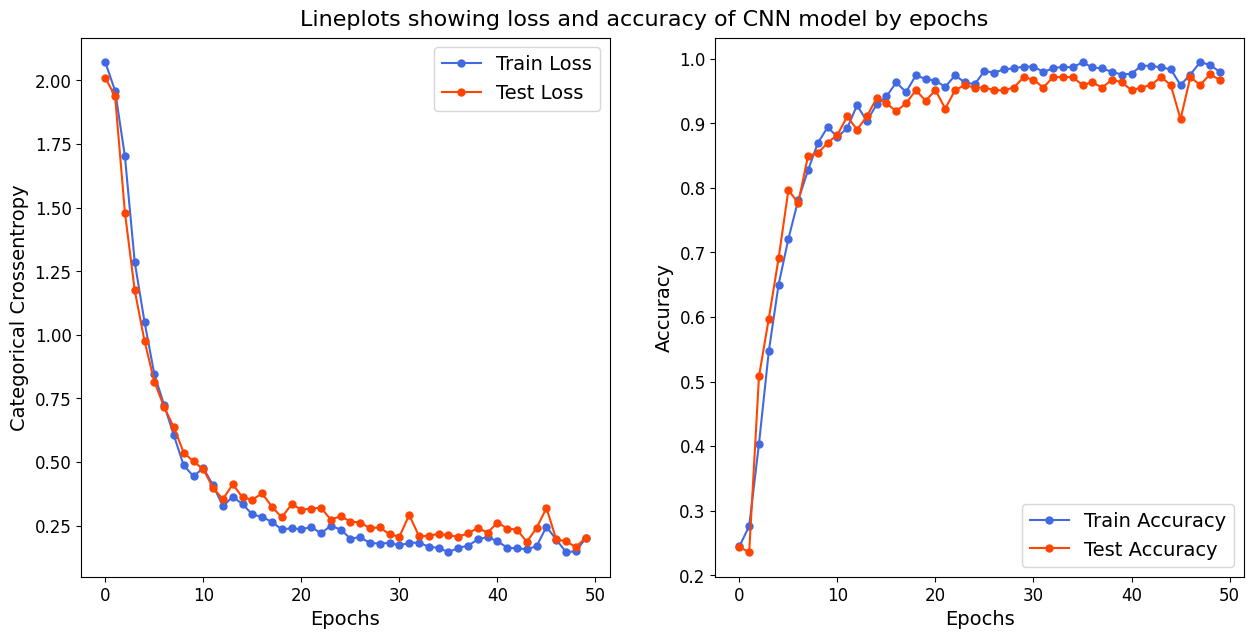

In [ ]:
input = Input(shape = (48,48,1))

conv1 = Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2)) (conv1)

conv2 = Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2)) (conv2)

conv3 = Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2)) (conv3)

conv4 = Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size = (2,2)) (conv4)

flatten = Flatten()(pool4)

dense_1 = Dense(128,activation='relu')(flatten)

drop_1 = Dropout(0.2)(dense_1)

output = Dense(7,activation="sigmoid")(drop_1)

model = Model(inputs=input,outputs=output)
model.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=['accuracy'])
model.summary()

fle_s='/content/drive/MyDrive/CVIP Project/output/emotion_model.keras'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

save = model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=50,callbacks=[callback_list])

# Checking the train and test loss and accuracy values from the neural network above.

train_loss = save.history['loss']
test_loss = save.history['val_loss']
train_accuracy = save.history['accuracy']
test_accuracy = save.history['val_accuracy']

# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,887 (90.98 MB)

 Trainable params: 263,175 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.2357 - loss: 1.9979
Epoch 1: val_loss improved from inf to 1.75405, saving model to /content/drive/MyDrive/CVIP Project/output/emotion_resnet50_model.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 27s 713ms/step - accuracy: 0.2370 - loss: 1.9945 - val_accuracy: 0.2764 - val_loss: 1.7540
Epoch 2/100
21/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3506 - loss: 1.6892
Epoch 2: val_loss improved from 1.75405 to 1.64181, saving model to /content/drive/MyDrive/CVIP Project/output/emotion_resnet50_model.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 82ms/step - accuracy: 0.3522 - loss: 1.6897 - val_accuracy: 0.3455 - val_loss: 1.6418
Epoch 3/100
20/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3863 - loss: 1.6134
Epoch 3: val_loss improved from 1.64181 to 1.58058, saving model to /content/drive/MyDrive/CVIP Project/output/emotion_resnet50_model.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.3872 - loss: 1.6135 - val_accuracy: 

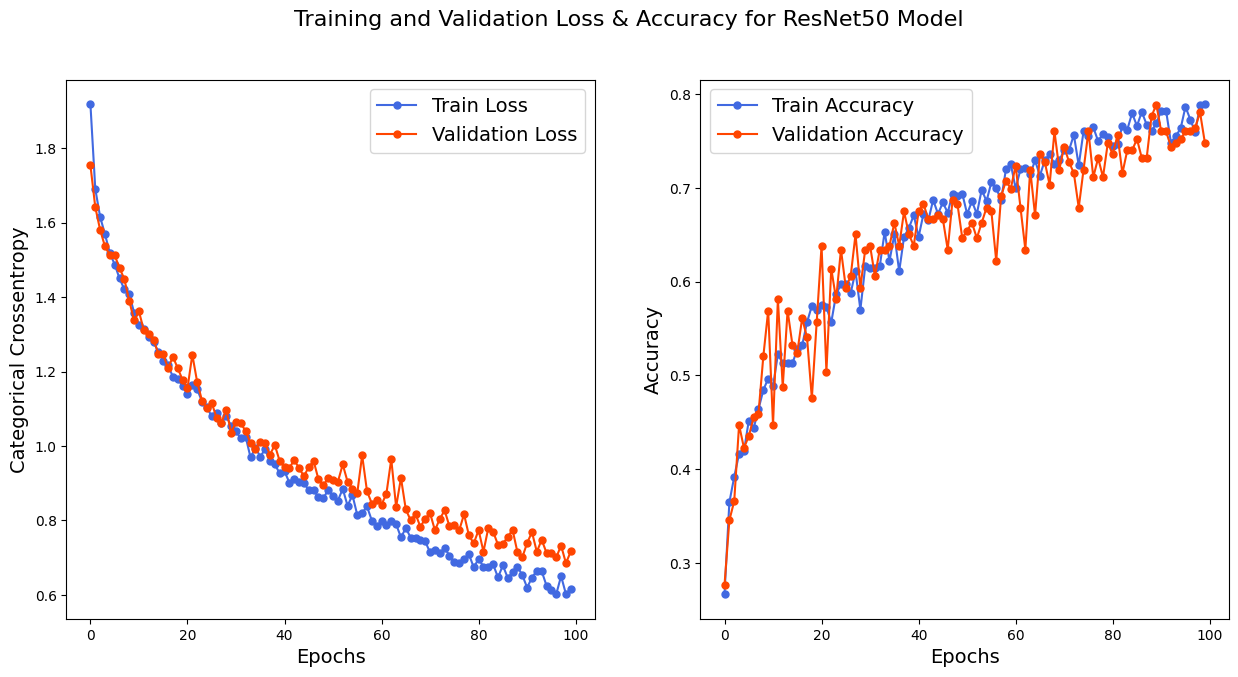

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# ResNet-50 Model Definition
def build_resnet50_model(input_shape=(48, 48, 3), num_classes=7):
    # Load pre-trained ResNet-50 model without the top layer
    base_model = tf.keras.applications.ResNet50(include_top=False,
                                                input_shape=input_shape,
                                                weights='imagenet',
                                                pooling='avg')
    # Freeze the layers of the ResNet-50 base model
    for layer in base_model.layers:
        layer.trainable = False

    # Build model
    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)  # Pass inputs through ResNet-50 base model
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Convert images to RGB (ResNet50 expects 3-channel input)
X_train_rgb = np.stack([np.repeat(image[..., np.newaxis], 3, axis=-1) for image in X_train])
X_test_rgb = np.stack([np.repeat(image[..., np.newaxis], 3, axis=-1) for image in X_test])

# Model Initialization and Compilation
model = build_resnet50_model(input_shape=(48, 48, 3), num_classes=7)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Model Checkpoint Callback
checkpoint_path = '/content/drive/MyDrive/CVIP Project/output/emotion_resnet50_model.keras'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', verbose=1,
                                      save_best_only=True, mode='auto')

# Model Training
history = model.fit(X_train_rgb, Y_train, batch_size=32, validation_data=(X_test_rgb, Y_test),
                    epochs=100, callbacks=[checkpoint_callback])

# Plot Loss and Accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig, ax = plt.subplots(ncols=2, figsize=(15, 7))
ax = ax.ravel()

# Loss Plot
ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(val_loss, label='Validation Loss', color='orangered', marker='o', markersize=5)
ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)
ax[0].legend(fontsize=14)

# Accuracy Plot
ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(val_accuracy, label='Validation Accuracy', color='orangered', marker='o', markersize=5)
ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)
ax[1].legend(fontsize=14)

fig.suptitle("Training and Validation Loss & Accuracy for ResNet50 Model", fontsize=16)
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_path = '/content/drive/MyDrive/CVIP Project/output/emotion_resnet50_model.keras'
loaded_model = load_model(model_path)

# Evaluate the model on the training data
train_loss, train_accuracy = loaded_model.evaluate(X_train_rgb, Y_train, verbose=1)
print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")

# Evaluate the model on the testing data
test_loss, test_accuracy = loaded_model.evaluate(X_test_rgb, Y_test, verbose=1)
print(f"Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy:.4f}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.8513 - loss: 0.5212
Training Loss: 0.5351, Training Accuracy: 0.8503
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step - accuracy: 0.7897 - loss: 0.6810
Testing Loss: 0.6852, Testing Accuracy: 0.7805


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 441ms/step
Classification Report:
               precision    recall  f1-score   support

     disgust       0.84      0.69      0.76        39
       anger       0.67      0.72      0.70        43
    contempt       0.50      0.45      0.48        11
       happy       0.92      0.92      0.92        50
        fear       0.71      0.62      0.67        24
    surprise       0.86      0.95      0.90        58
     sadness       0.57      0.62      0.59        21

    accuracy                           0.78       246
   macro avg       0.73      0.71      0.72       246
weighted avg       0.78      0.78      0.78       246



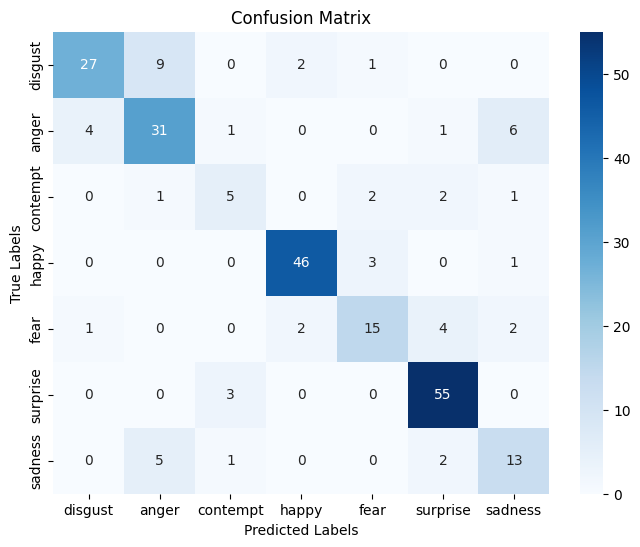

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions on the test set
Y_pred_probs = loaded_model.predict(X_test_rgb)  # Get probabilities
Y_pred = np.argmax(Y_pred_probs, axis=1)  # Convert probabilities to class labels
Y_true = np.argmax(Y_test, axis=1)  # True class labels

# Generate the classification report with seven target names
class_report = classification_report(
    Y_true, Y_pred,
    target_names=['disgust', 'anger', 'contempt', 'happy', 'fear', 'surprise', 'sadness']
)
print("Classification Report:\n", class_report)

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred, labels=[0, 1, 2, 3, 4, 5, 6])  # Use the indices of your seven classes

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['disgust', 'anger', 'contempt', 'happy', 'fear', 'surprise', 'sadness'],
            yticklabels=['disgust', 'anger', 'contempt', 'happy', 'fear', 'surprise', 'sadness'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the path to the image you want to test
test_image_path = '/content/drive/MyDrive/CVIP Project/test_image.jpg'

# Load the image and preprocess it for model prediction
image = cv2.imread(test_image_path)

# Check if image loading was successful
if image is None:
    print(f"Error: Could not load image from {test_image_path}. Please check the file path and ensure the image exists.")
else:
    # Keep a copy of the original image for display
    original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format for proper display

    # Preprocess the image for the model
    processed_image = cv2.resize(original_image, (48, 48))  # Resize to 48x48 for the model
    processed_image = processed_image / 255.0  # Normalize the image
    processed_image = np.expand_dims(processed_image, axis=0)  # Add batch dimension (1, 48, 48, 3)

    # Load the model if not already loaded
    loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/CVIP Project/output/emotion_resnet50_model.keras')

    # Make a prediction
    predicted_probs = loaded_model.predict(processed_image)
    predicted_class = np.argmax(predicted_probs, axis=1)[0]  # Get the class with the highest probability

    # Define labels for the seven classes
    labels = ['disgust', 'anger', 'contempt', 'happy', 'fear', 'surprise', 'sadness']
    predicted_label = labels[predicted_class]

    # Display the original image
    plt.imshow(original_image)
    plt.axis('off')
    plt.title(f"Predicted Emotion: {predicted_label}")
    plt.show()

    # Print the result
    print(f"The predicted emotion for the test image is: {predicted_label}")


Error: Could not load image from /content/drive/MyDrive/CVIP Project/test_image.jpg. Please check the file path and ensure the image exists.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


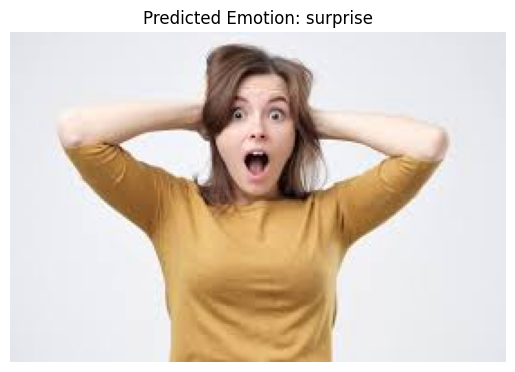

The predicted emotion for /content/drive/MyDrive/CVIP Project/test_image1.jpg is: surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


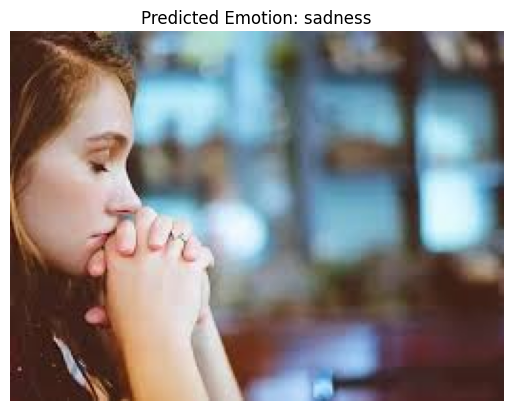

The predicted emotion for /content/drive/MyDrive/CVIP Project/test_image2.jpg is: sadness


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the paths to the images you want to test
test_image_paths = [
    '/content/drive/MyDrive/CVIP Project/test_image1.jpg',
    '/content/drive/MyDrive/CVIP Project/test_image2.jpg'
]

# Load the model once
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/CVIP Project/output/emotion_resnet50_model.keras')

# Define labels for the seven classes
labels = ['disgust', 'anger', 'contempt', 'happy', 'fear', 'surprise', 'sadness']

# Loop through each image path for prediction and display
for test_image_path in test_image_paths:
    # Load the image and preprocess it for model prediction
    image = cv2.imread(test_image_path)

    # Check if image loading was successful
    if image is None:
        print(f"Error: Could not load image from {test_image_path}. Please check the file path and ensure the image exists.")
    else:
        # Keep a copy of the original image for display
        original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format for proper display

        # Preprocess the image for the model
        processed_image = cv2.resize(original_image, (48, 48))  # Resize to 48x48 for the model
        processed_image = processed_image / 255.0  # Normalize the image
        processed_image = np.expand_dims(processed_image, axis=0)  # Add batch dimension (1, 48, 48, 3)

        # Make a prediction
        predicted_probs = loaded_model.predict(processed_image)
        predicted_class = np.argmax(predicted_probs, axis=1)[0]  # Get the class with the highest probability

        # Get the predicted label
        predicted_label = labels[predicted_class]

        # Display the original image with the prediction
        plt.imshow(original_image)
        plt.axis('off')
        plt.title(f"Predicted Emotion: {predicted_label}")
        plt.show()

        # Print the result
        print(f"The predicted emotion for {test_image_path} is: {predicted_label}")
